In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
stack_data = pd.read_csv("C:\\Users\\TOYIN OLAPE\\Documents\\Stutern\\Data Sets\\Stackoverflow.csv")
stack_data.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [6]:
stack_data.dtypes


SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object

In [18]:
stack_num_data = stack_data.select_dtypes(include=["int64","float"])
stack_num_data.columns


Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')

## Encoding Categorical Data 

In [20]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(stack_data, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


In [19]:
# Create dummy variables for the Country column
dummy = pd.get_dummies(stack_data, columns=["Country"], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


In [23]:
# Create a series out of the Country column
countries = stack_data['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(pd.value_counts(countries))

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64
South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Other            14
Name: Country, dtype: int64


C:\Users\TOYIN OLAPE\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
# Create the Paid_Job column filled with zeros
stack_data["Paid_Job"] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
stack_data.loc[stack_data["ConvertedSalary"] > 0,'Paid_Job'] = 1

# Print the first five rows of the columns
print(stack_data[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


In [25]:
# Bin the continuous variable ConvertedSalary into 5 bins
stack_data['equal_binned'] = pd.cut(stack_data['ConvertedSalary'], 5)

# Print the first 5 rows of the equal_binned column
print(stack_data[['equal_binned', 'ConvertedSalary']].head())

"""Output from Data Camp

          equal_binned  ConvertedSalary
0  (-2000.0, 400000.0]              0.0
1  (-2000.0, 400000.0]          70841.0
2  (-2000.0, 400000.0]              0.0
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0

"""

          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


In [26]:
# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
stack_data['boundary_binned'] = pd.cut(stack_data['ConvertedSalary'], 
                                         bins, labels= labels)

# Print the first 5 rows of the boundary_binned column
print(stack_data[['boundary_binned', 'ConvertedSalary']].head())

"""
Output on Datacamp

      boundary_binned  ConvertedSalary
    0        Very low              0.0
    1          Medium          70841.0
    2        Very low              0.0
    3             Low          21426.0
    4             Low          41671.0
    
"""

  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


## Dealing with Messy Data


In [27]:
#SUbset only the age and gender column 
sub_df = stack_data[["Age","Gender"]]

print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Age       999 non-null int64
Gender    693 non-null object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


In [29]:
print(sub_df.head(10))

   Age  Gender
0   21    Male
1   38    Male
2   45     NaN
3   46    Male
4   39    Male
5   39    Male
6   34    Male
7   24  Female
8   23    Male
9   36     NaN


In [30]:
# Print the locations of the non-missing values
print(sub_df.head(10).notnull())
# Print the locations of the missing values
print(sub_df.head(10).isnull())

    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False
     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True


### Listwise deletion

In [31]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = stack_data.dropna(how="any")

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(264, 14)


In [32]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = stack_data.dropna(how= "any", axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 8)


In [33]:
# Drop all rows where Gender is missing
no_gender = stack_data.dropna(subset = ["Gender"])

# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 14)


In [35]:
# Replace missing values
stack_data['Gender'].fillna(value="Not Given", inplace = True)

# Print the count of each value
print(stack_data['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Non-binary. genderqueer. or gender non-conforming                              1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Name: Gender, dtype: int64


In [38]:
# Fill missing values with the mean
stack_data['StackOverflowJobsRecommend'].fillna(stack_data['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
stack_data['StackOverflowJobsRecommend'] = round(stack_data['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(stack_data['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [40]:
# Remove the commas in the column
stack_data['RawSalary'] = stack_data['RawSalary'].str.replace(',', '')

# Remove the commas in the column
stack_data['RawSalary'] = stack_data['RawSalary'].str.replace('$', '')

In [41]:
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(stack_data['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
print(stack_data['RawSalary'][idx])

0             NaN
2             NaN
4       £41671.00
6             NaN
8             NaN
11            NaN
13            NaN
15      £75000.00
16      £10958.00
20            NaN
22            NaN
25            NaN
27            NaN
28            NaN
29            NaN
30            NaN
34            NaN
37            NaN
38      £90000.00
41            NaN
43            NaN
44            NaN
45            NaN
47      £48955.00
48            NaN
49      £19500.00
50            NaN
52            NaN
53      £36000.00
54            NaN
          ...    
925           NaN
926           NaN
927           NaN
929           NaN
934           NaN
936           NaN
937     £63156.00
938      £8496.00
941           NaN
942           NaN
944     £75000.00
948           NaN
949           NaN
952           NaN
954           NaN
955           NaN
960           NaN
961           NaN
962     £80286.00
964    £154000.00
966           NaN
975           NaN
976           NaN
977           NaN
980       

In [42]:
# Replace the offending characters
stack_data['RawSalary'] = stack_data['RawSalary'].str.replace("£","")

# Convert the column to float
stack_data['RawSalary'] = stack_data['RawSalary'].astype("float")

# Print the column
print(stack_data['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
5       120000.0
6            NaN
7       250000.0
8            NaN
9            0.0
10       47904.0
11           NaN
12       95968.0
13           NaN
14         420.0
15       75000.0
16       10958.0
17       51408.0
18       72611.0
19      900000.0
20           NaN
21       30000.0
22           NaN
23       44000.0
24       60000.0
25           NaN
26       80000.0
27           NaN
28           NaN
29           NaN
         ...    
969      37200.0
970      79973.0
971      73428.0
972      56298.0
973      17628.0
974     125000.0
975          NaN
976          NaN
977          NaN
978      75000.0
979       6576.0
980          NaN
981      60000.0
982      80000.0
983      90000.0
984      70000.0
985      39648.0
986      99967.0
987       2352.0
988      50448.0
989          NaN
990          NaN
991      55562.0
992          NaN
993      30000.0
994          NaN
995      58746.0
996      55000

## Markdown

In [46]:
# Earlier this was changed to float alreayd. Just to execute the method chining i've changed it back to a string 

stack_data['RawSalary'] = stack_data['RawSalary']\
                              .astype("str")

# Use method chaining
stack_data['RawSalary'] = stack_data['RawSalary']\
                              .str.replace(",","")\
                              .str.replace("$","")\
                              .str.replace("£","")\
                              .astype("float")
 
# Print the RawSalary column
print(stack_data['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
5       120000.0
6            NaN
7       250000.0
8            NaN
9            0.0
10       47904.0
11           NaN
12       95968.0
13           NaN
14         420.0
15       75000.0
16       10958.0
17       51408.0
18       72611.0
19      900000.0
20           NaN
21       30000.0
22           NaN
23       44000.0
24       60000.0
25           NaN
26       80000.0
27           NaN
28           NaN
29           NaN
         ...    
969      37200.0
970      79973.0
971      73428.0
972      56298.0
973      17628.0
974     125000.0
975          NaN
976          NaN
977          NaN
978      75000.0
979       6576.0
980          NaN
981      60000.0
982      80000.0
983      90000.0
984      70000.0
985      39648.0
986      99967.0
987       2352.0
988      50448.0
989          NaN
990          NaN
991      55562.0
992          NaN
993      30000.0
994          NaN
995      58746.0
996      55000

## Conforming to Statistical Assumptions

In [50]:
#Reloading the csv file to ignore all changes made.

stack_data1 = pd.read_csv("C:\\Users\\TOYIN OLAPE\\Documents\\Stutern\\Data Sets\\Stackoverflow.csv")

cat_col = stack_data1.select_dtypes(include=['object']).columns
num_col = stack_data1.select_dtypes(exclude=['object']).columns
df_cat = stack_data1[cat_col]
df_num = stack_data1[num_col]

df_num.head()


,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience
0,NaN,NaN,21,13
1,70841.0,7.0,38,9
2,NaN,8.0,45,11
3,21426.0,NaN,46,12
4,41671.0,8.0,39,7


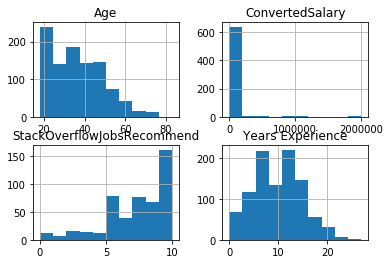

In [60]:
df_num.hist()
plt.show()

C:\Users\TOYIN OLAPE\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\TOYIN OLAPE\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


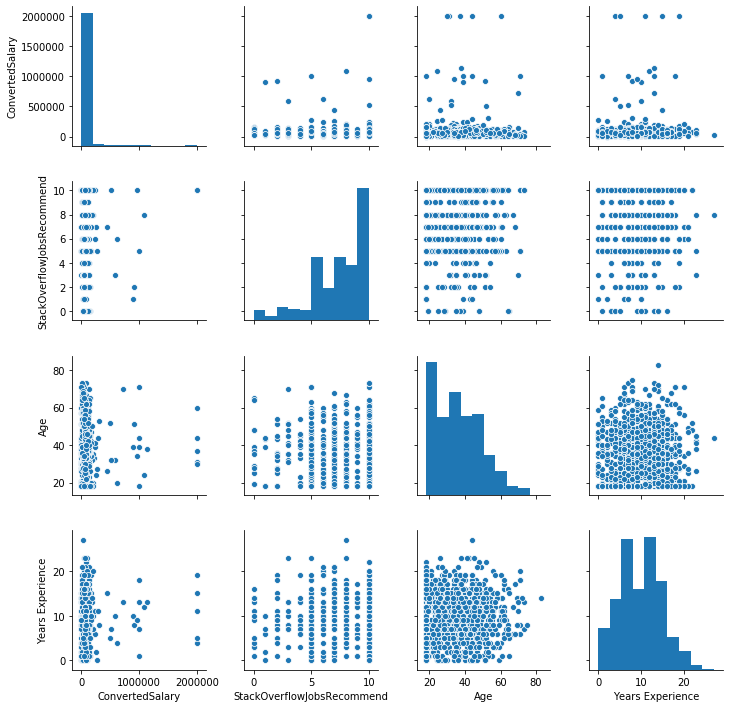

In [61]:
sns.pairplot(df_num)

## Scaling and Transformation

In [63]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(df_num[['Age']])

# Transform the data using the fitted scaler
df_num['Age_MM'] = MM_scaler.transform(df_num[['Age']])

# Compare the origional and transformed column
print(df_num[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


C:\Users\TOYIN OLAPE\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [64]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(df_num[['Age']])

# Transform the data using the fitted scaler
df_num['Age_SS'] = SS_scaler.transform(df_num[['Age']])

# Compare the origional and transformed column
print(df_num[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


C:\Users\TOYIN OLAPE\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


C:\Users\TOYIN OLAPE\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


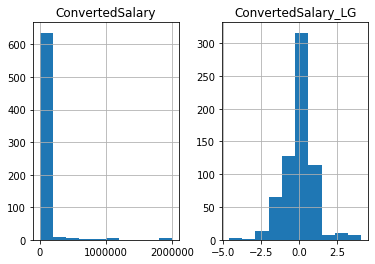

In [65]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(df_num[["ConvertedSalary"]])

# Apply the power transform to the data
df_num['ConvertedSalary_LG'] = pow_trans.transform(df_num[['ConvertedSalary']])

# Plot the data before and after the transformation
df_num[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

## Removing Outliers

### Quantile based detection

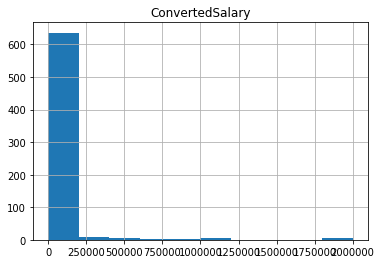

<Figure size 432x288 with 0 Axes>

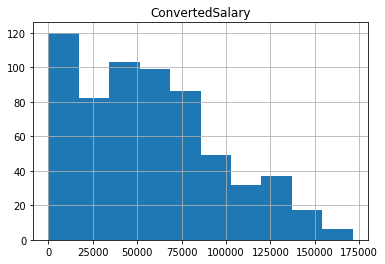

In [70]:
# Find the 95th quantile
quantile = df_num['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = df_num[df_num['ConvertedSalary'] < quantile]

# The original histogram
df_num[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

### Standard deviation based  detection

In [ ]:
# Find the mean and standard dev
std = df_num['ConvertedSalary'].std()
mean = df_num['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = df_num[(df_num['ConvertedSalary'] < upper) 
                           & (df_num['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

## Data Leakage

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[["Age"]])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[["Age"]])
print(so_test_numeric[['Age', 'Age_ss']].head())

In [ ]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

# Dealing with text data

In [68]:
pres_data = pd.read_csv("C:\\Users\\TOYIN OLAPE\\Documents\\Stutern\\Data Sets\\inaugural_speeches.csv")
pres_data.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


In [69]:
pres_data["text"].head()

0    Fellow-Citizens of the Senate and of the House...
1    Fellow Citizens:  I AM again called upon by th...
2    WHEN it was first perceived, in early times, t...
3    Friends and Fellow-Citizens:  CALLED upon to u...
4    PROCEEDING, fellow-citizens, to that qualifica...
Name: text, dtype: object

In [71]:
# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

NameError: name 'speech_df' is not defined

In [ ]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer 

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print(cv.get_feature_names())

In [ ]:
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()

# Print the shape of cv_array
print(cv_array.shape)

In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df = 0.2, max_df = 0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

In [ ]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())